In [12]:
!install pyclustering
!install openpyxl

SyntaxError: invalid syntax (3856731456.py, line 1)

## Kaggle: Creditcard 
- source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
- github repository: 


About Dataset

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Acknowledgements from Kaggle

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project



## Import Library

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Dataset Selection

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset with low_memory=False to suppress warnings about mixed types
df2 = pd.read_csv('C:/Users/H S/Downloads/content/creditcard.csv', low_memory=False)

# Step 2: Handle missing values
df2.dropna(inplace=True)

# Drop non-numeric columns (e.g., customer IDs or categorical data)
df_numeric = df2.select_dtypes(include=[np.number])

# Step 3: Take a Random Sample of the Dataset for Efficiency
sample_size = 15000  # Adjust sample size based on computational capacity
df2_sample = df_numeric.sample(n=sample_size, random_state=42)

# Standardize the data
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2_sample)

df2.shape

(284807, 31)

## Dimensionality Reduction

(15000, 2)


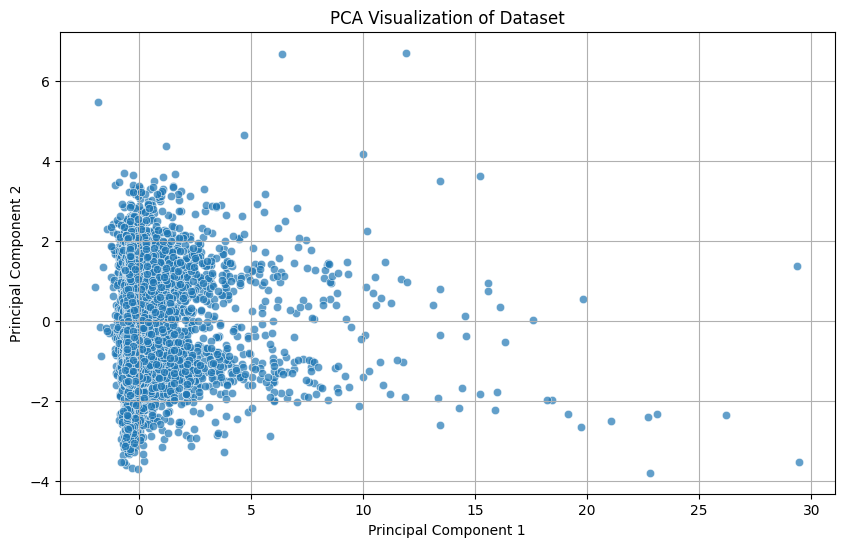

In [56]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN with column mean
df2_imputed = imputer.fit_transform(df2_scaled)  # Impute missing values

# Step 2: Perform PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
df2_pca = pca.fit_transform(df2_imputed)
print(df2_pca.shape)


# Step 3: Visualize the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df2_pca[:, 0], y=df2_pca[:, 1], alpha=0.7)
plt.title("PCA Visualization of Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


## Clustering Implementation

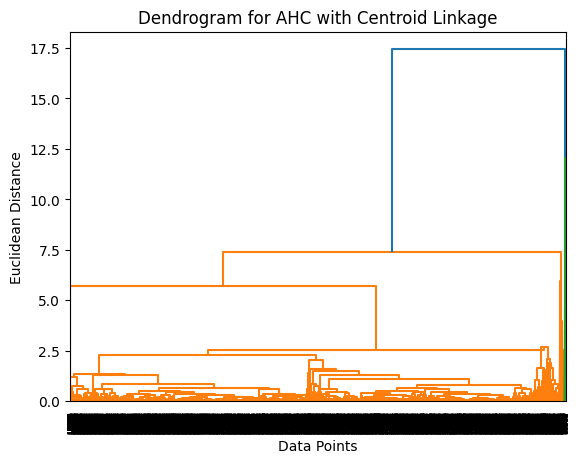

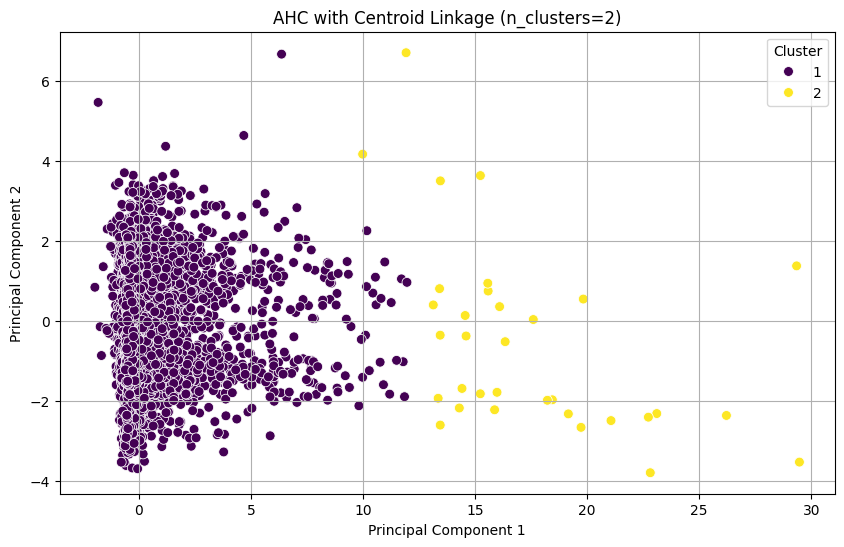

In [57]:
# Clustering Implementations

# Import necessary libraries
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist  # Import pdist for pairwise distance computation

## (ii) AHC with Centroid Linkage
distance_matrix = pdist(df2_pca, metric='euclidean')
 
linkage_matrix = linkage(distance_matrix, method='centroid')
dendrogram(linkage_matrix)
plt.title("Dendrogram for AHC with Centroid Linkage")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

n_clusters_ahc = 2  # Choose the number of clusters from dendrogram analysis
ahc_clusters = fcluster(linkage_matrix, n_clusters_ahc, criterion='maxclust')

# Add cluster labels to the dataset for analysis and visualization
df2_sample['Cluster'] = ahc_clusters

# # Visualize AHC results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df2_pca[:, 0], y=df2_pca[:, 1], hue=ahc_clusters, palette='viridis', s=50)
plt.title(f"AHC with Centroid Linkage (n_clusters={n_clusters_ahc})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()


Cluster Validation Results:
Silhouette Score: 0.890
Davies-Bouldin Index: 0.329
Calinski-Harabasz Index: 3527.111


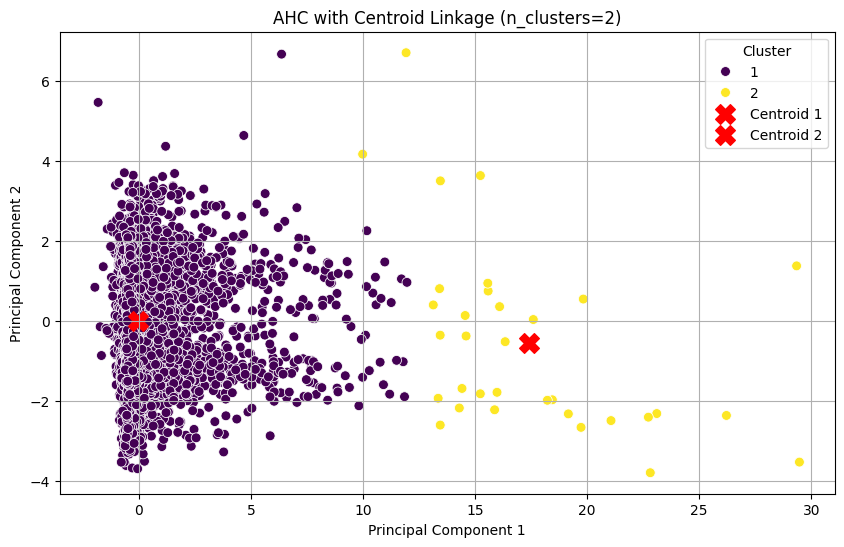

In [59]:
# Step 5: Cluster Validation Metrics

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_clustering(data, labels):
    """Evaluate clustering performance using multiple metrics."""
    silhouette_avg = silhouette_score(data, labels) if len(set(labels)) > 1 else None
    davies_bouldin = davies_bouldin_score(data, labels) if len(set(labels)) > 1 else None
    calinski_harabasz = calinski_harabasz_score(data, labels) if len(set(labels)) > 1 else None
    
    print(f"Silhouette Score: {silhouette_avg:.3f}" if silhouette_avg else "Silhouette Score: Not Applicable")
    print(f"Davies-Bouldin Index: {davies_bouldin:.3f}" if davies_bouldin else "Davies-Bouldin Index: Not Applicable")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}" if calinski_harabasz else "Calinski-Harabasz Index: Not Applicable")

print("\nCluster Validation Results:")
evaluate_clustering(df2_pca, ahc_clusters)

# Step 6: Visualize Clusters in PCA-Reduced Dimensions with Centroids Marked
plt.figure(figsize=(10, 6))

# Scatterplot of data points colored by cluster labels
sns.scatterplot(x=df2_pca[:, 0], y=df2_pca[:, 1], hue=ahc_clusters, palette='viridis', s=50)

# Calculate and plot centroids for each cluster
unique_clusters = np.unique(ahc_clusters)
centroids = []
for cluster in unique_clusters:
    cluster_points = df2_pca[ahc_clusters == cluster]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)
    plt.scatter(centroid[0], centroid[1], c='red', s=200, marker='X', label=f'Centroid {cluster}')

plt.title(f"AHC with Centroid Linkage (n_clusters={len(unique_clusters)})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc='best')
plt.grid(True)
plt.show()